In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
import warnings


warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
data_pzt5 = pd.read_csv('PZT5 MALZEME DEGİSİMİ-NZ2_14 İCİN.csv')
data = data_pzt5.iloc[:, 2:4] # 3. ve 4. kolonları seçelim
data = data.loc[:175, :] # ilk 175 satırı seçelim
data['ynz2_14_f1_x2_izort (koordinat)'] = data['ynz2_14_f1_x2_izort (koordinat)'] / 100 # koordinat değerlerini /10 yapmam gerekli
data

,ynz2_14_f1_x2_izort (koordinat),ynz2_14_f1_x2_inort
0,0.000000,0.000000e+00
1,0.000625,0.000000e+00
2,0.001250,0.000000e+00
3,0.001875,0.000000e+00
4,0.002500,0.000000e+00
5,0.003125,0.000000e+00
6,0.003750,0.000000e+00
7,0.004375,0.000000e+00
8,0.005000,0.000000e+00
9,0.005625,0.000000e+00


In [4]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [5]:
data.isna().any()

ynz2_14_f1_x2_izort (koordinat)    False
ynz2_14_f1_x2_inort                False
dtype: bool

In [6]:
data.describe()

,ynz2_14_f1_x2_izort (koordinat),ynz2_14_f1_x2_inort
count,176.000000,1.760000e+02
mean,0.050000,3.233171e-01
std,0.028961,3.525546e-01
min,0.000000,-1.130000e-08
25%,0.025000,0.000000e+00
50%,0.050000,0.000000e+00
75%,0.075000,7.256596e-01
max,0.100000,7.666826e-01


In [7]:
data.ynz2_14_f1_x2_inort.value_counts()

 0.000000e+00    89
 7.413282e-01     2
 7.597143e-01     2
 7.366825e-01     2
 7.233367e-01     2
 7.256596e-01     2
 7.196639e-01     2
 5.366778e-01     1
 7.412888e-01     1
 2.300048e-01     1
 7.353479e-01     1
 7.340133e-01     1
 7.326787e-01     1
 7.313442e-01     1
 7.300096e-01     1
 7.286750e-01     1
 7.273404e-01     1
 7.260059e-01     1
 7.246713e-01     1
 3.066730e-01     1
 7.229694e-01     1
 7.226022e-01     1
 7.222349e-01     1
 7.218676e-01     1
 7.389856e-01     1
 7.435920e-01     1
 7.211330e-01     1
 7.458952e-01     1
 7.600000e-02     1
 1.519428e-01     1
 2.279143e-01     1
 3.038857e-01     1
 3.798571e-01     1
 4.558286e-01     1
 5.318000e-01     1
 6.077714e-01     1
 6.837428e-01     1
 1.533365e-01     1
 7.574111e-01     1
 7.551079e-01     1
 7.528047e-01     1
 7.505015e-01     1
 7.481984e-01     1
 7.215003e-01     1
 7.207658e-01     1
 6.133461e-01     1
 7.350608e-01     1
 7.381945e-01     1
 7.397614e-01     1
 4.600096e-01     1


### veri kontrol edildi, problem yok 

In [8]:
data.shape

(176, 2)

In [9]:
X = data.iloc[:, :1].values
y = data.iloc[:,1].values

In [10]:
X.shape, y.shape

((176, 1), (176,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### RandomForestRegressor deneyelim

[[ 0.00e+00  0.00e+00]
 [ 2.51e-02  7.67e-02]
 [-3.55e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.38e-01  7.40e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.48e-01  7.57e-01]
 [-3.55e-10  0.00e+00]
 [ 7.37e-01  7.37e-01]
 [-3.55e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [-3.55e-10  0.00e+00]
 [ 9.20e-04  0.00e+00]
 [ 7.56e-01  7.55e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.38e-01  7.39e-01]
 [ 7.42e-01  7.44e-01]
 [ 7.23e-01  7.23e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.46e-01  7.46e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.44e-01  7.41e-01]
 [ 7.55e-01  7.54e-01]
 [-3.55e-10  0.00e+00]
 [-3.55e-10  0.00e+00]
 [-3.55e-10  0.00e+00]
 [ 7.50e-01  7.53e-01]
 [ 7.44e-01  7.41e-01]
 [ 7.20e-01  7.20e-01]
 [ 7.45e-01  7.67e-01]
 [ 0.00e+00  0.00e+00]
 [ 3.39e-01  3.04e-01]
 [-3.55e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 5.52e-03  0.00e+00]
 [-3.55e-10  0.00e+00]
 [-3.55e-10  0.00e+00]
 [ 7.23e-01  7.23e-01]
 [-3.55e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.35e-01  7.35e-01]
 [ 7.21e-01  7.21e-01]
 [ 7.36e-01

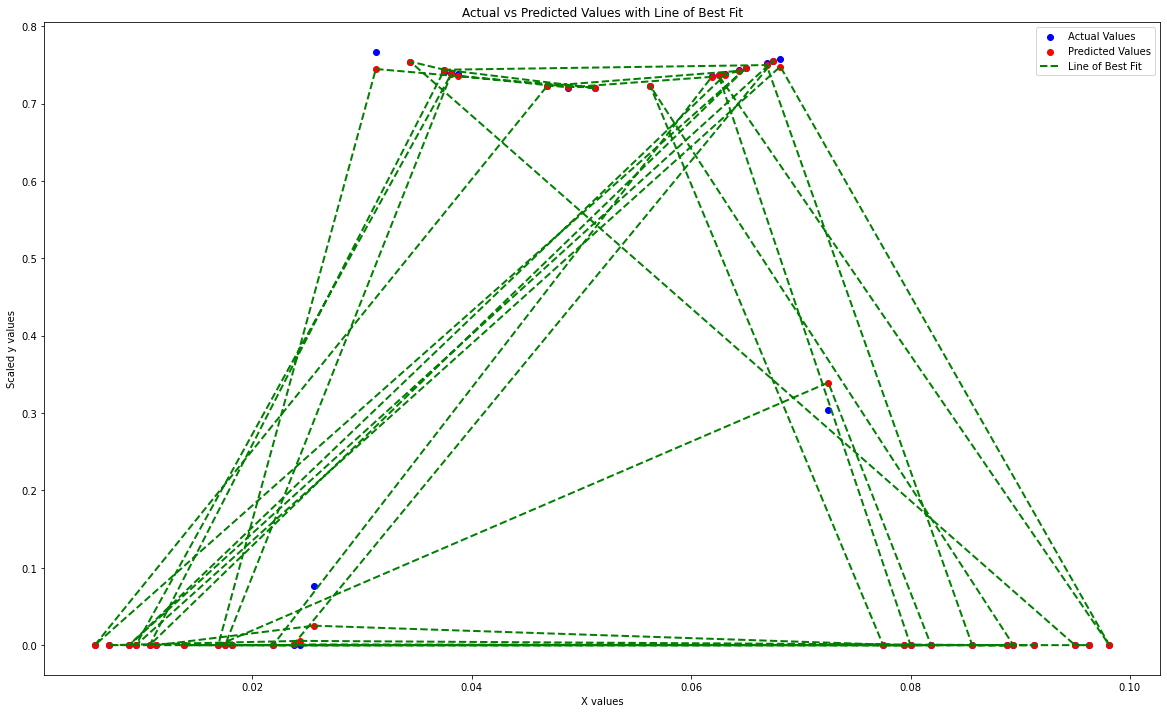

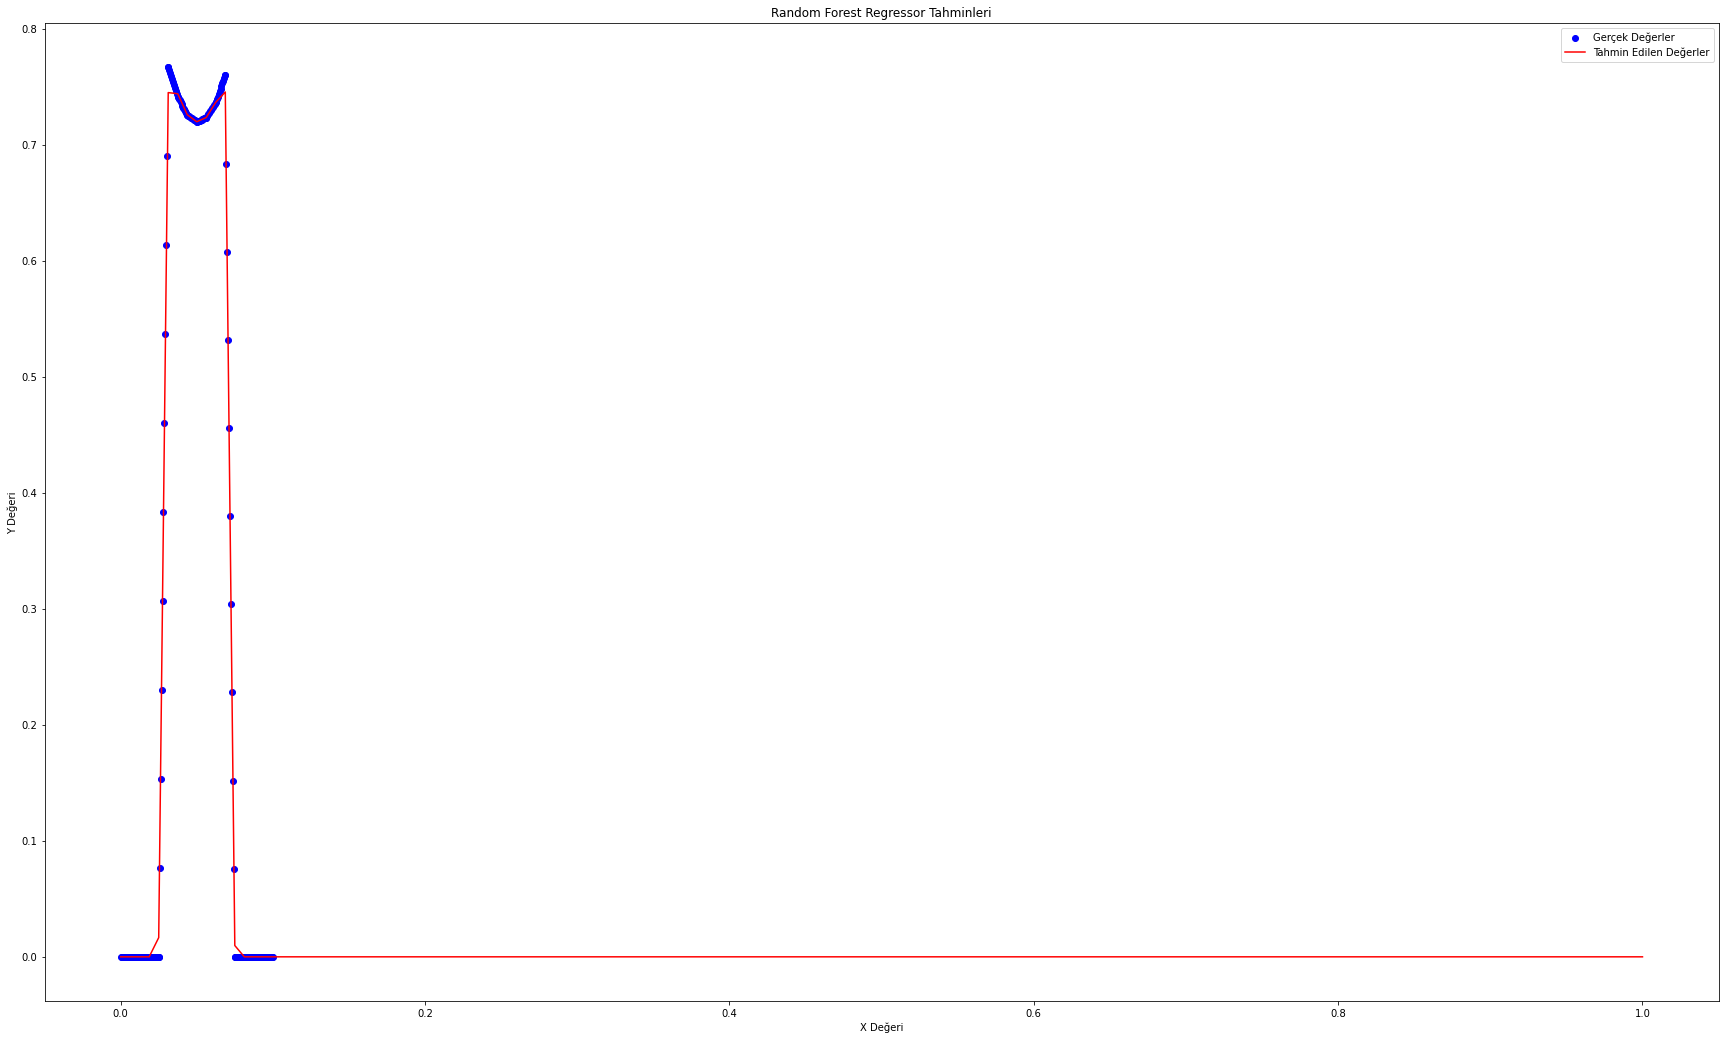

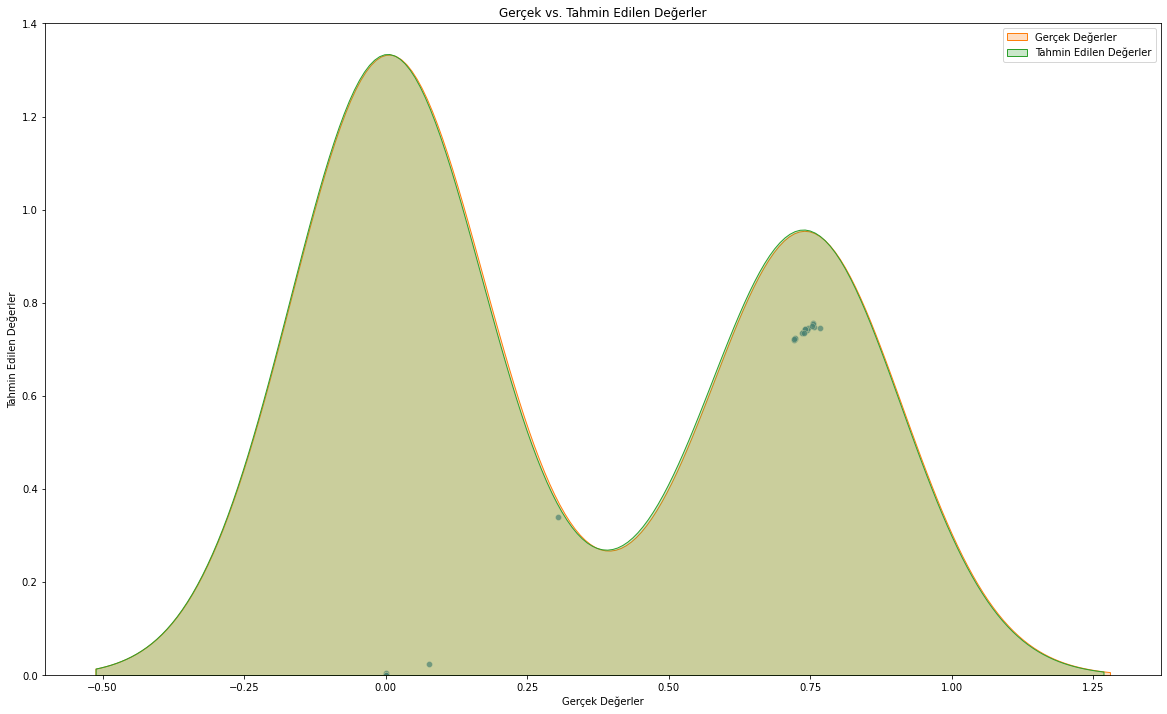

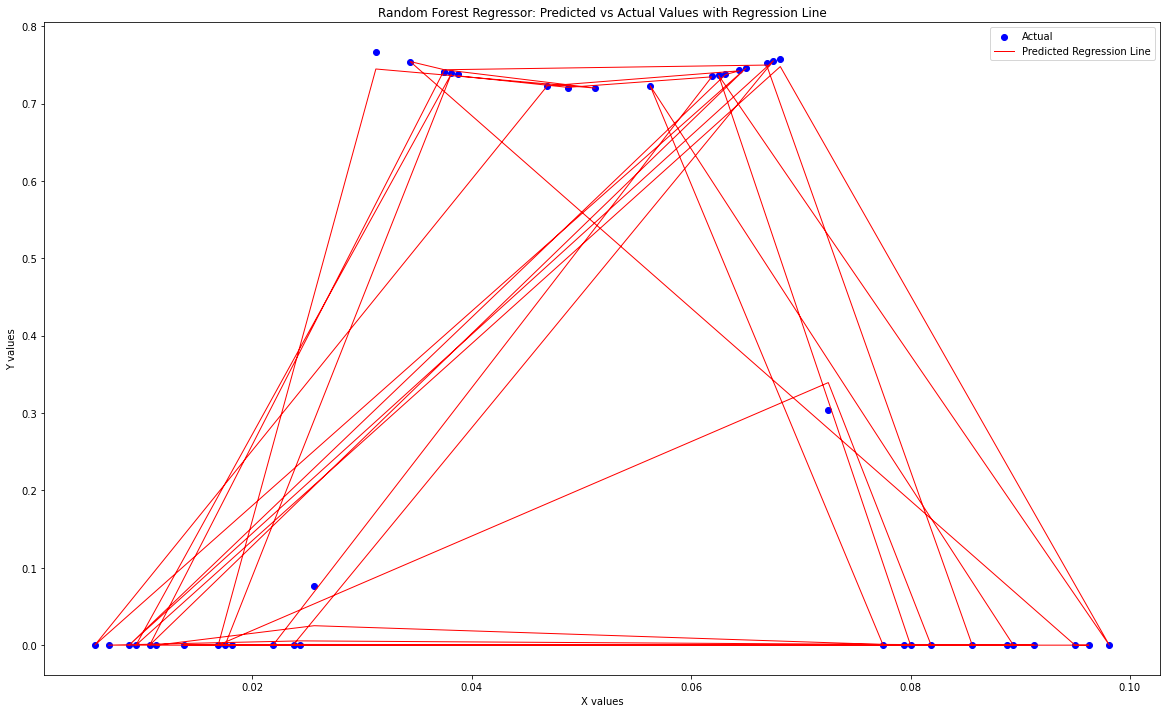

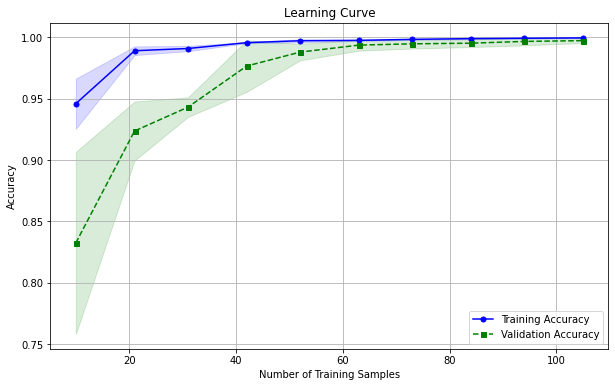

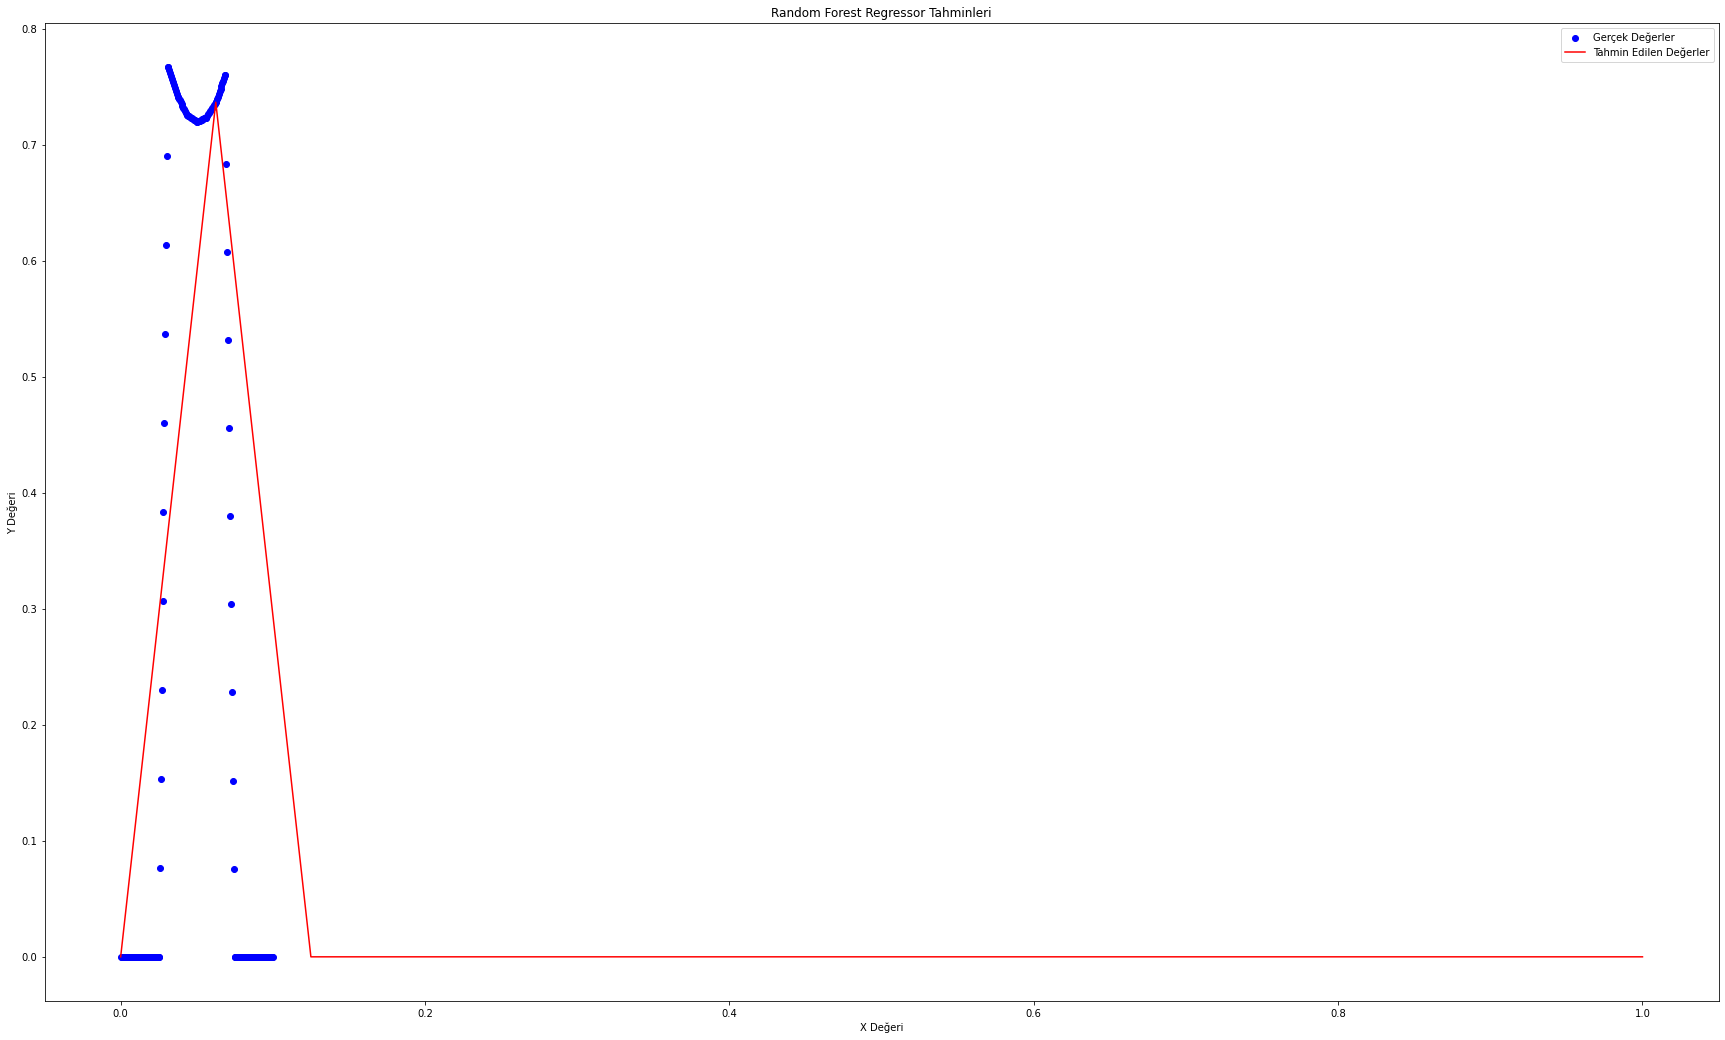

[-3.55e-10]


In [21]:
rf_reg = RandomForestRegressor(n_estimators = 250 , criterion='squared_error',random_state = 42) 
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = rf_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", rf_reg.score(X,y))

plt.figure(figsize=(20, 12))

# Scatter plot for predicted vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')

# Line plot to connect predicted and actual values
plt.plot(X_test, y_pred, color='green', linestyle='dashed', linewidth=2, label='Line of Best Fit')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Scaled y values')
plt.title('Actual vs Predicted Values with Line of Best Fit')

# Adding legend
plt.legend()

# Show the plot
plt.show()



# Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.00625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Random Forest Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rf_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()

### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.0625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(rf_reg.predict([[0.72500]])) #0.72500 == 3.038857e-01 gerçek değerde

### XGBRegressor ile deneyelim

[[0.   0.  ]
 [0.15 0.08]
 [0.   0.  ]
 [0.   0.  ]
 [0.74 0.74]
 [0.   0.  ]
 [0.76 0.76]
 [0.   0.  ]
 [0.74 0.74]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.76 0.76]
 [0.   0.  ]
 [0.74 0.74]
 [0.74 0.74]
 [0.72 0.72]
 [0.   0.  ]
 [0.75 0.75]
 [0.   0.  ]
 [0.74 0.74]
 [0.75 0.75]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.75 0.75]
 [0.74 0.74]
 [0.72 0.72]
 [0.76 0.77]
 [0.   0.  ]
 [0.23 0.3 ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.72 0.72]
 [0.   0.  ]
 [0.   0.  ]
 [0.74 0.74]
 [0.72 0.72]
 [0.74 0.74]]
0.9979385979041002
TEST SET
MAE:                 0.0016910730620545206
RMSE:                0.008208867399088896
MAPE:                inf
r2:                  0.9994547591967224


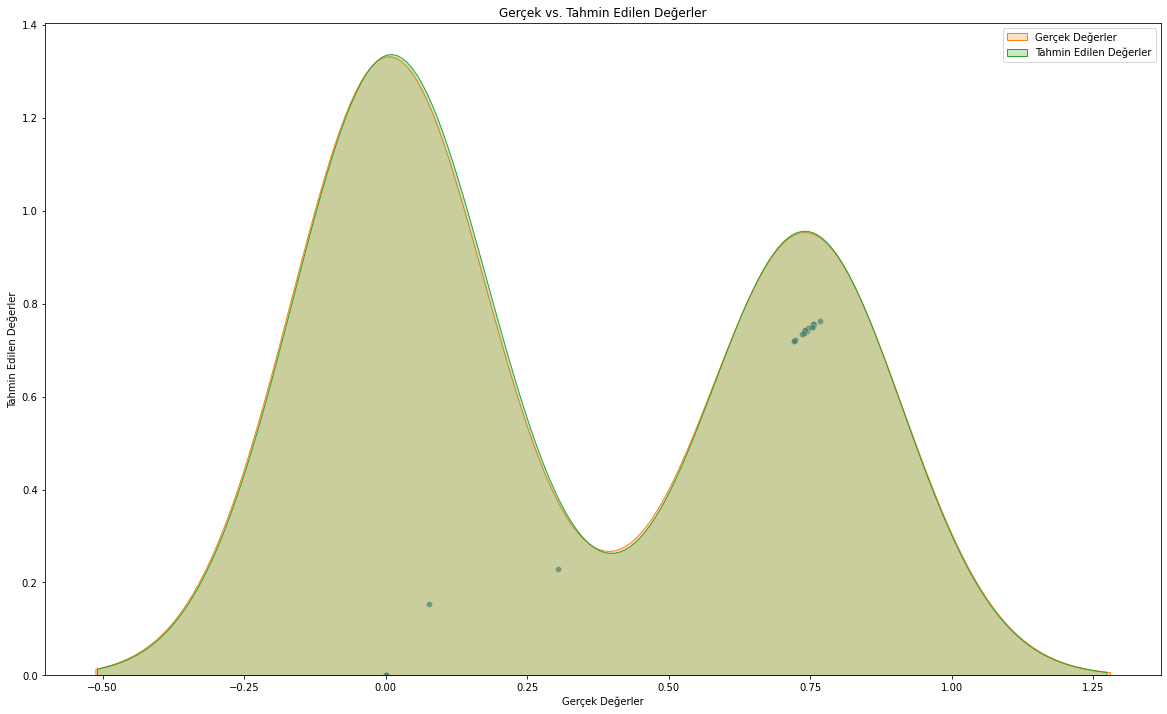

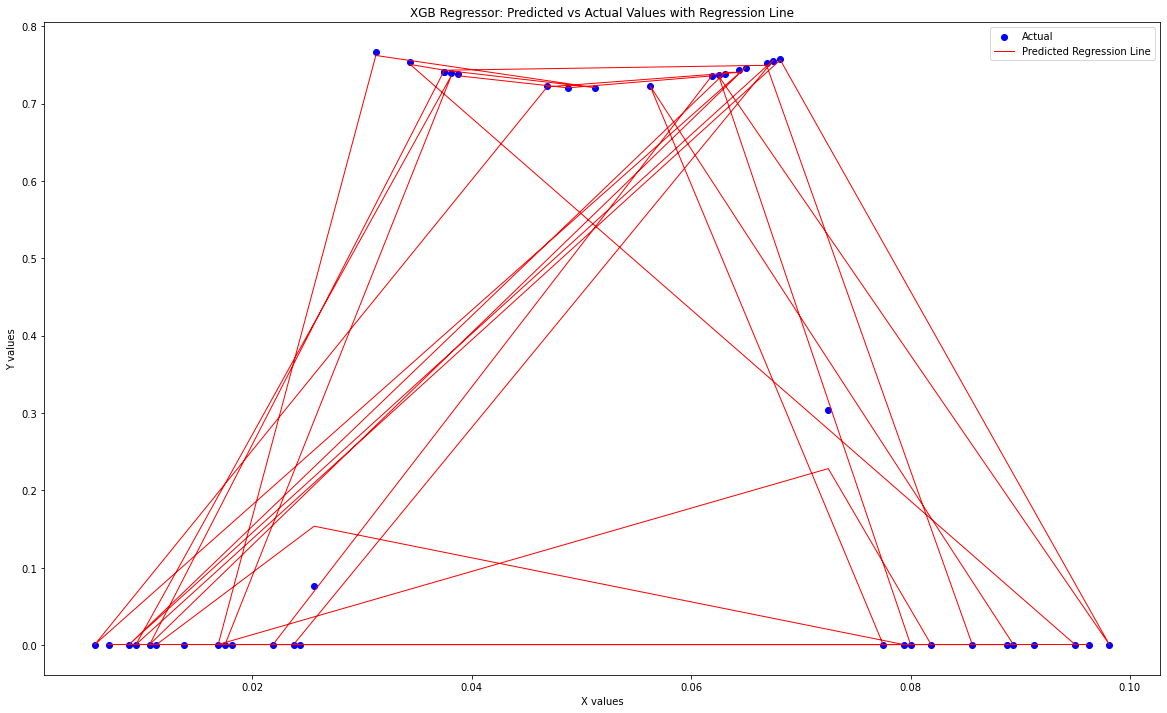

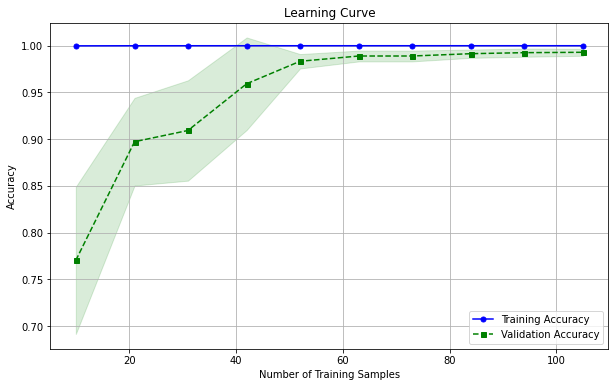

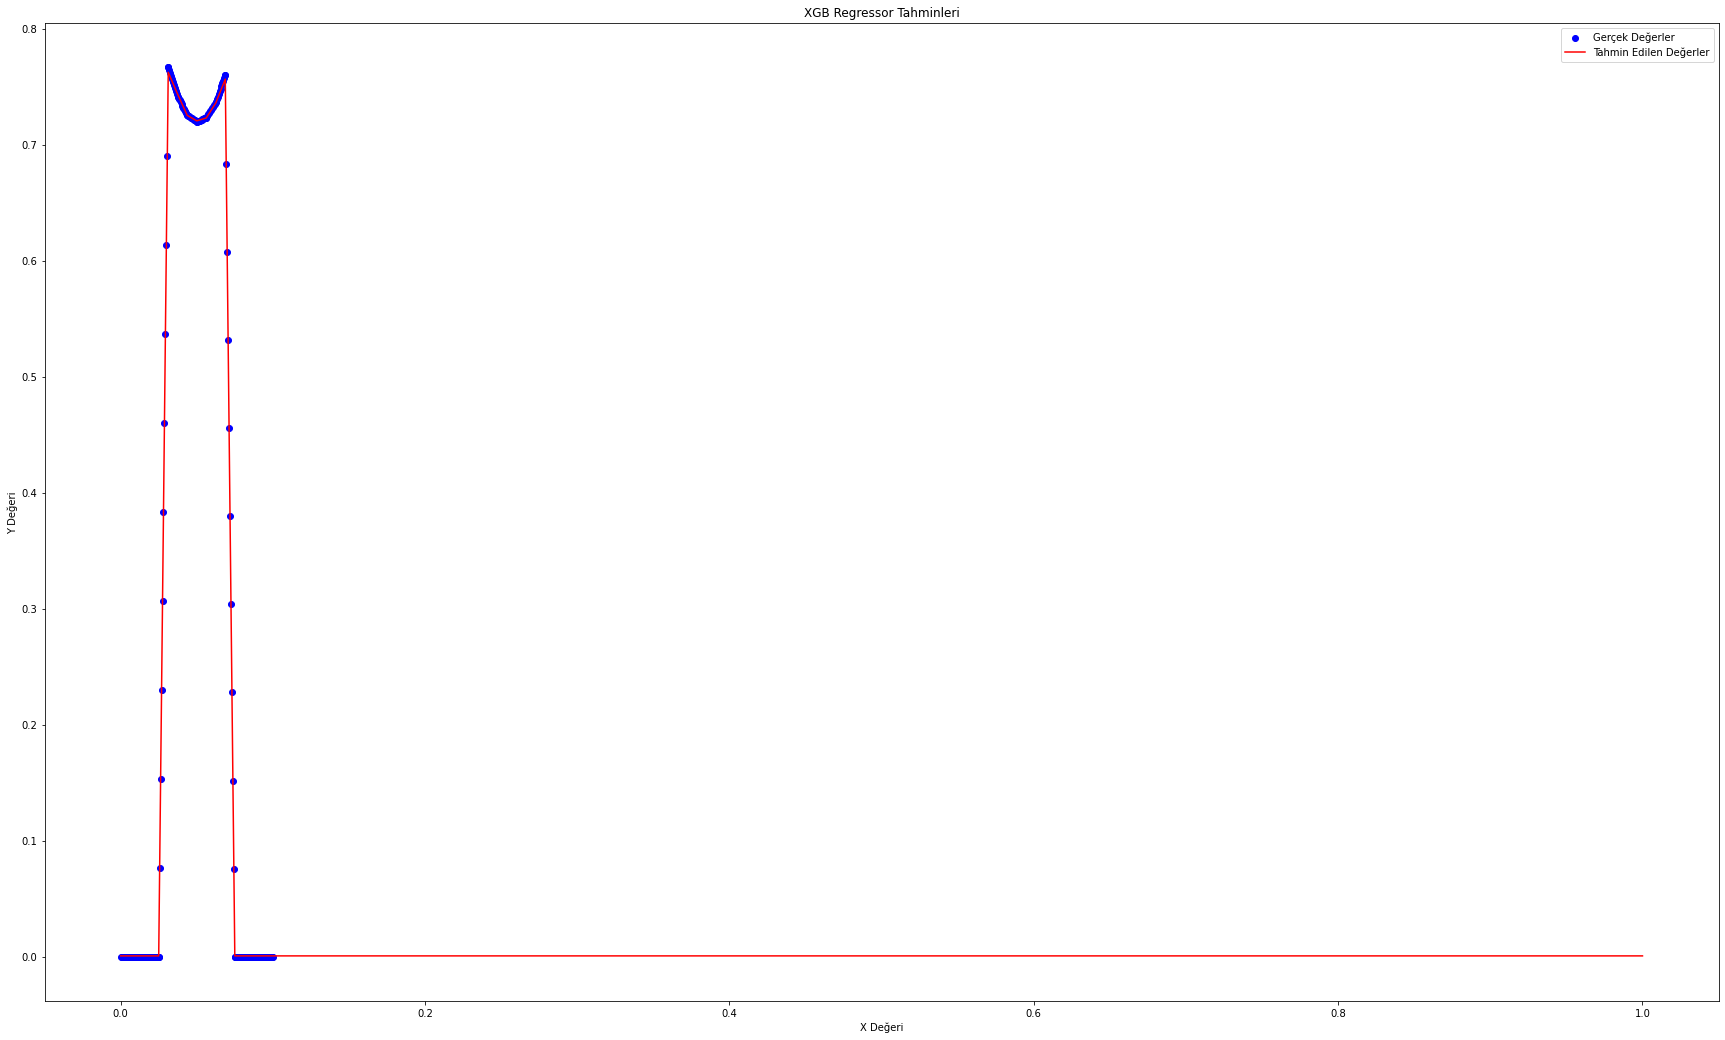

[0.]


In [13]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=220,
                    learning_rate = 0.03,
                    max_depth = 7,
                    random_state=42,
                    n_jobs = -1,
                    reg_lambda=0.995,
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = xgb.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", xgb.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('XGB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=xgb, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()


### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.00625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = xgb.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = xgb.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('XGB Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(xgb.predict([[0.72500]])) #0.72500 == 3.038857e-01 gerçek değerde

### GradientBoostingRegressor deneyelim

[[0.   0.  ]
 [0.   0.08]
 [0.   0.  ]
 [0.   0.  ]
 [0.74 0.74]
 [0.   0.  ]
 [0.75 0.76]
 [0.   0.  ]
 [0.73 0.74]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.75 0.76]
 [0.   0.  ]
 [0.73 0.74]
 [0.74 0.74]
 [0.72 0.72]
 [0.   0.  ]
 [0.74 0.75]
 [0.   0.  ]
 [0.74 0.74]
 [0.75 0.75]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.75 0.75]
 [0.74 0.74]
 [0.72 0.72]
 [0.75 0.77]
 [0.   0.  ]
 [0.38 0.3 ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.72 0.72]
 [0.   0.  ]
 [0.   0.  ]
 [0.73 0.74]
 [0.72 0.72]
 [0.74 0.74]]
0.9978744216534351
TEST SET
MAE:                 0.002446172143338213
RMSE:                0.008539686462672624
MAPE:                inf
r2:                  0.999409927031887


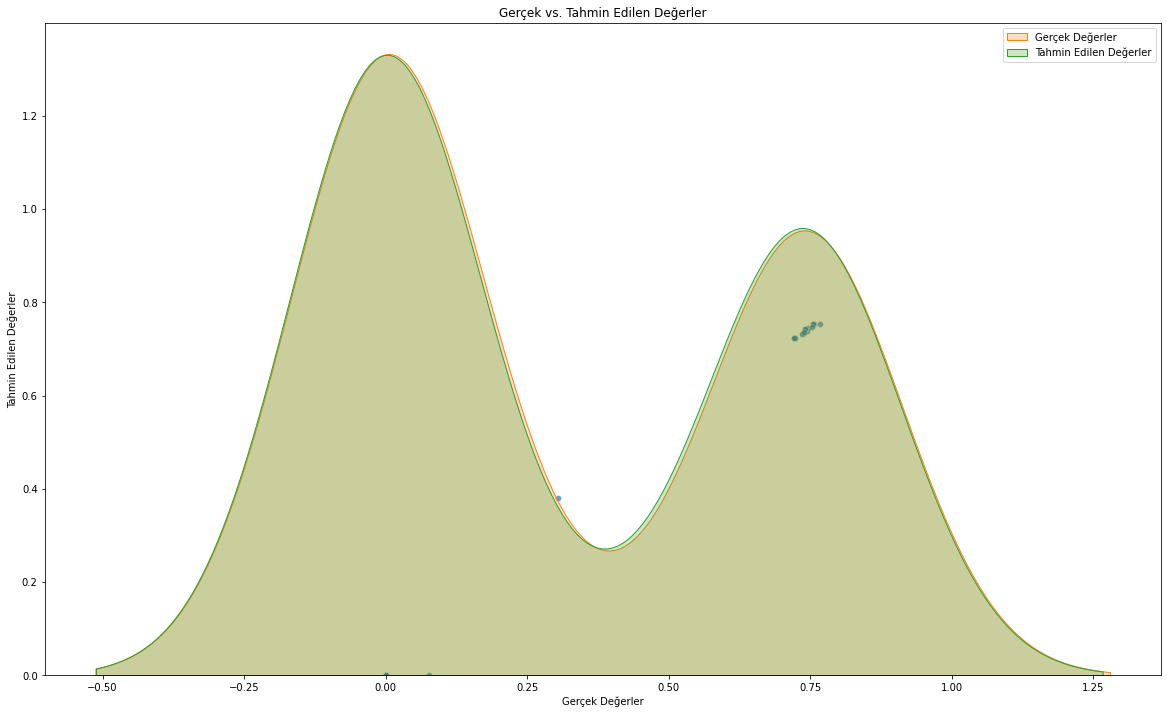

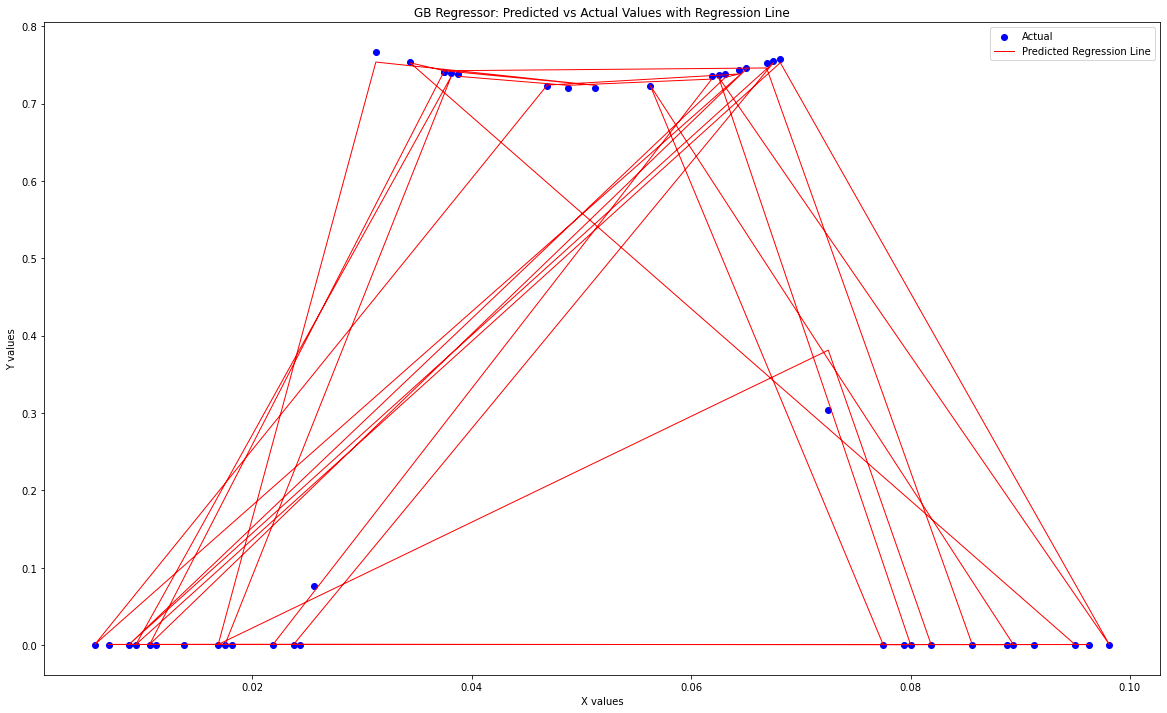

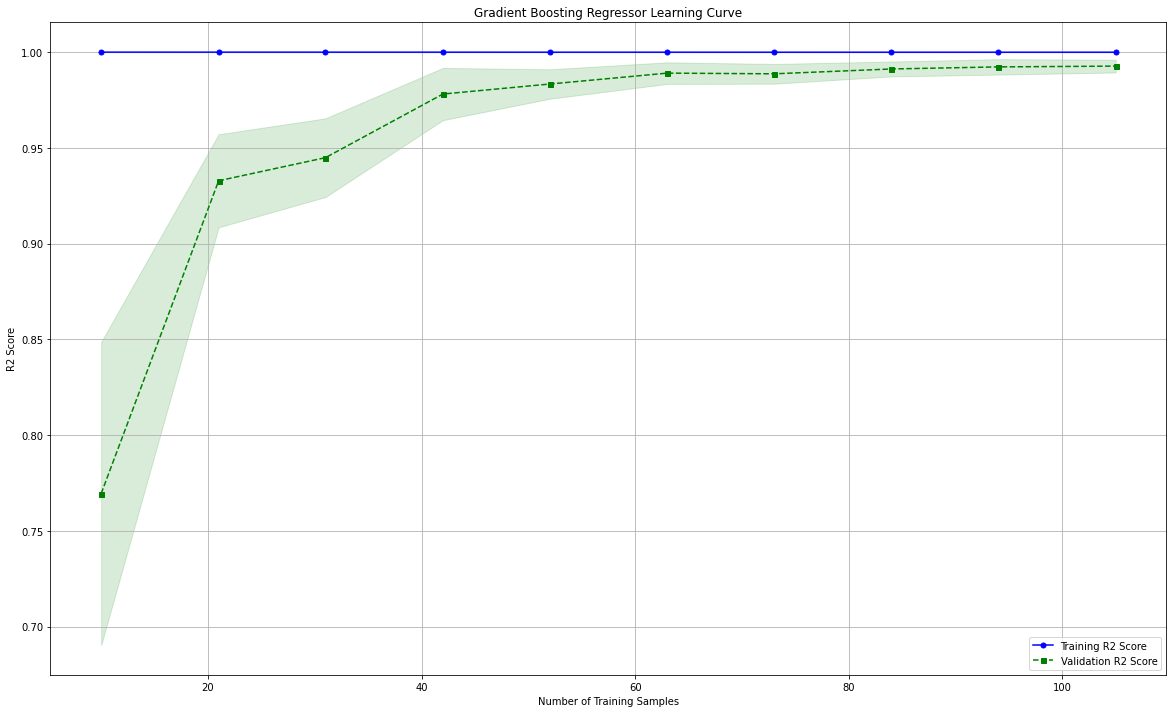

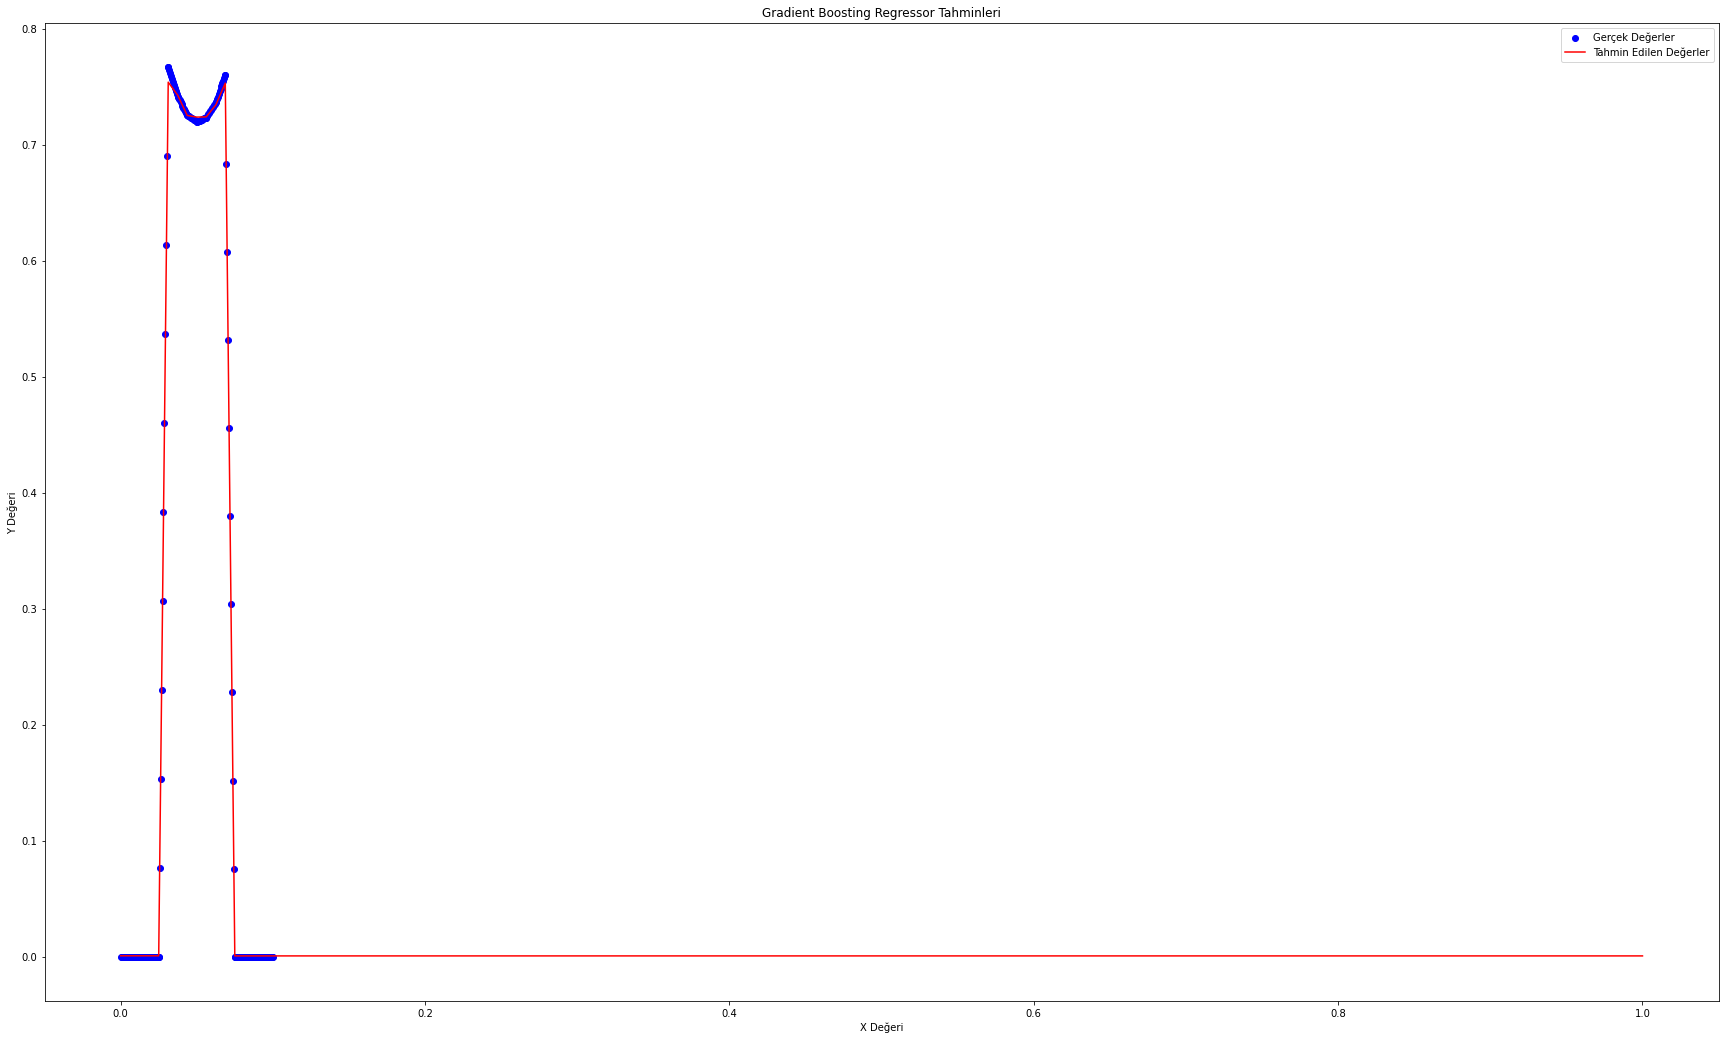

[0.]


In [14]:
gb_reg = GradientBoostingRegressor(random_state=42,n_estimators=220,criterion='squared_error', learning_rate = 0.03)

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = gb_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", gb_reg.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('GB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=gb_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Gradient Boosting Regressor Learning Curve')
plt.grid()
plt.show()


# Gradient Boosting Predict
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.00625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = gb_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = gb_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Gradient Boosting Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(gb_reg.predict([[0.72500]])) #0.72500 == 3.038857e-01 gerçek değerde

### SupportVectorRegressor deneyelim

[[-0.06  0.  ]
 [ 0.29  0.08]
 [ 0.09  0.  ]
 [ 0.03  0.  ]
 [ 0.68  0.74]
 [-0.06  0.  ]
 [ 0.47  0.76]
 [ 0.02  0.  ]
 [ 0.63  0.74]
 [ 0.08  0.  ]
 [-0.04  0.  ]
 [-0.05  0.  ]
 [ 0.22  0.  ]
 [ 0.49  0.76]
 [-0.06  0.  ]
 [ 0.61  0.74]
 [ 0.58  0.74]
 [ 0.78  0.72]
 [-0.03  0.  ]
 [ 0.56  0.75]
 [-0.06  0.  ]
 [ 0.67  0.74]
 [ 0.59  0.75]
 [-0.02  0.  ]
 [-0.01  0.  ]
 [-0.03  0.  ]
 [ 0.51  0.75]
 [ 0.67  0.74]
 [ 0.78  0.72]
 [ 0.49  0.77]
 [ 0.01  0.  ]
 [ 0.32  0.3 ]
 [ 0.03  0.  ]
 [ 0.04  0.  ]
 [-0.04  0.  ]
 [ 0.24  0.  ]
 [-0.06  0.  ]
 [ 0.15  0.  ]
 [ 0.74  0.72]
 [-0.06  0.  ]
 [ 0.15  0.  ]
 [ 0.64  0.74]
 [ 0.78  0.72]
 [ 0.69  0.74]]
0.8790578219801456
TEST SET
MAE:                 0.0845877324800778
RMSE:                0.11447887896137744
MAPE:                inf
r2:                  0.8939592955920894


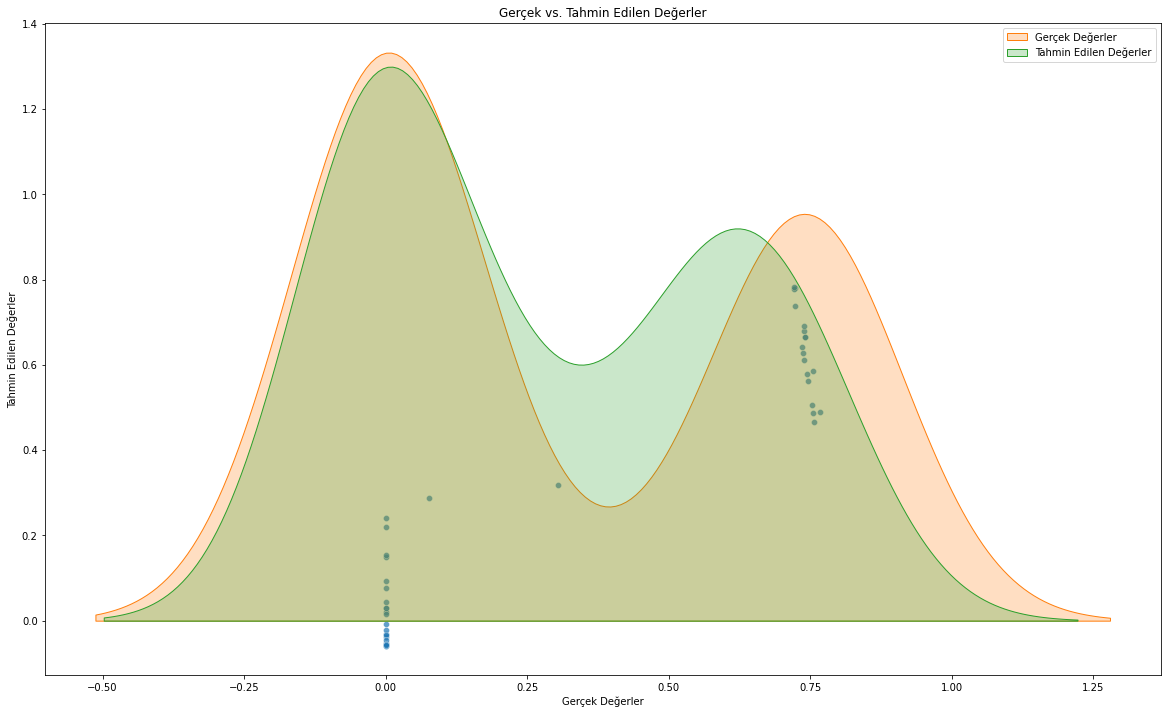

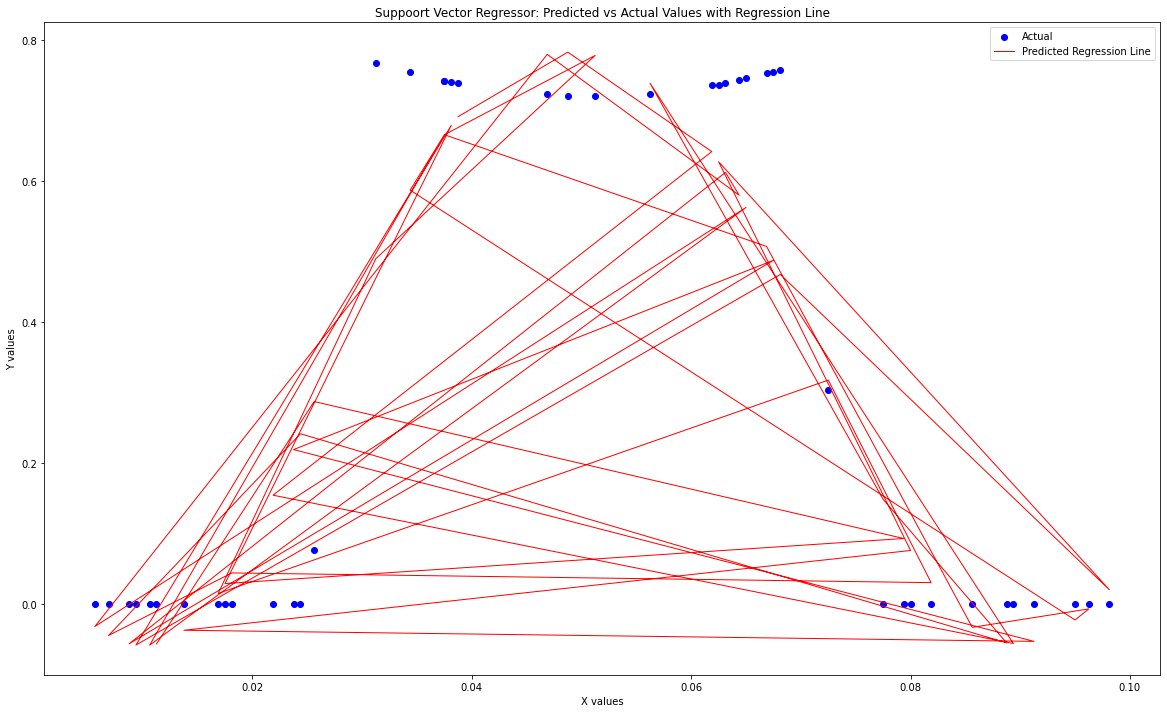

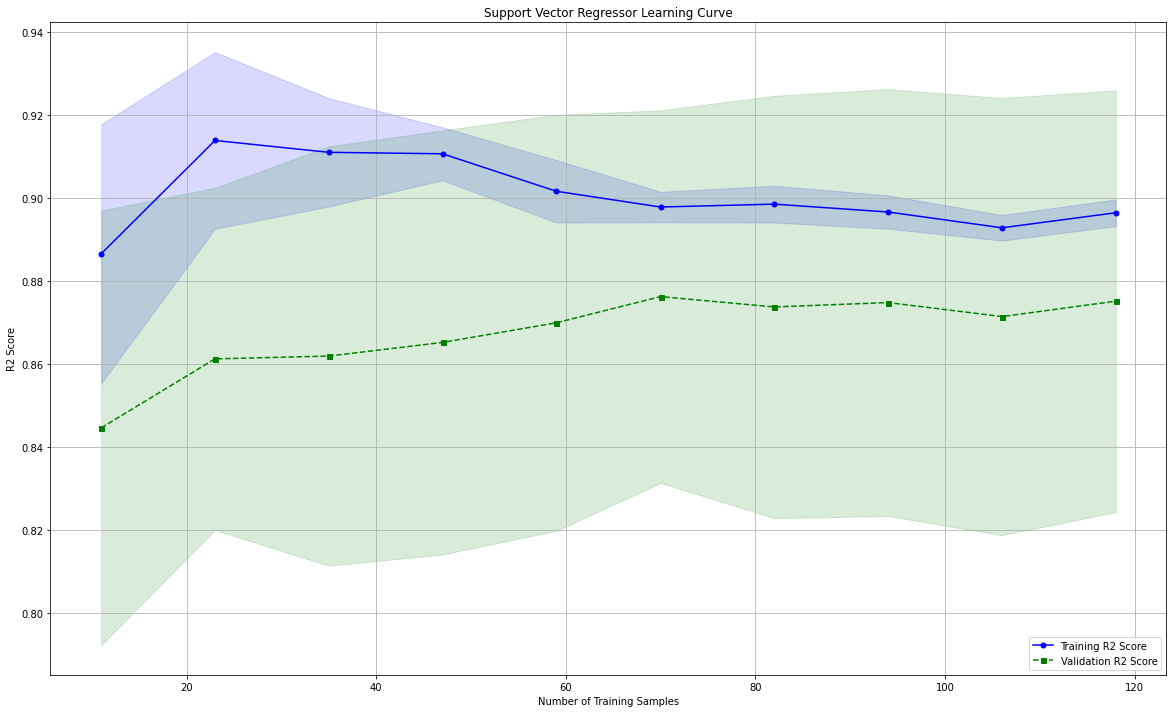

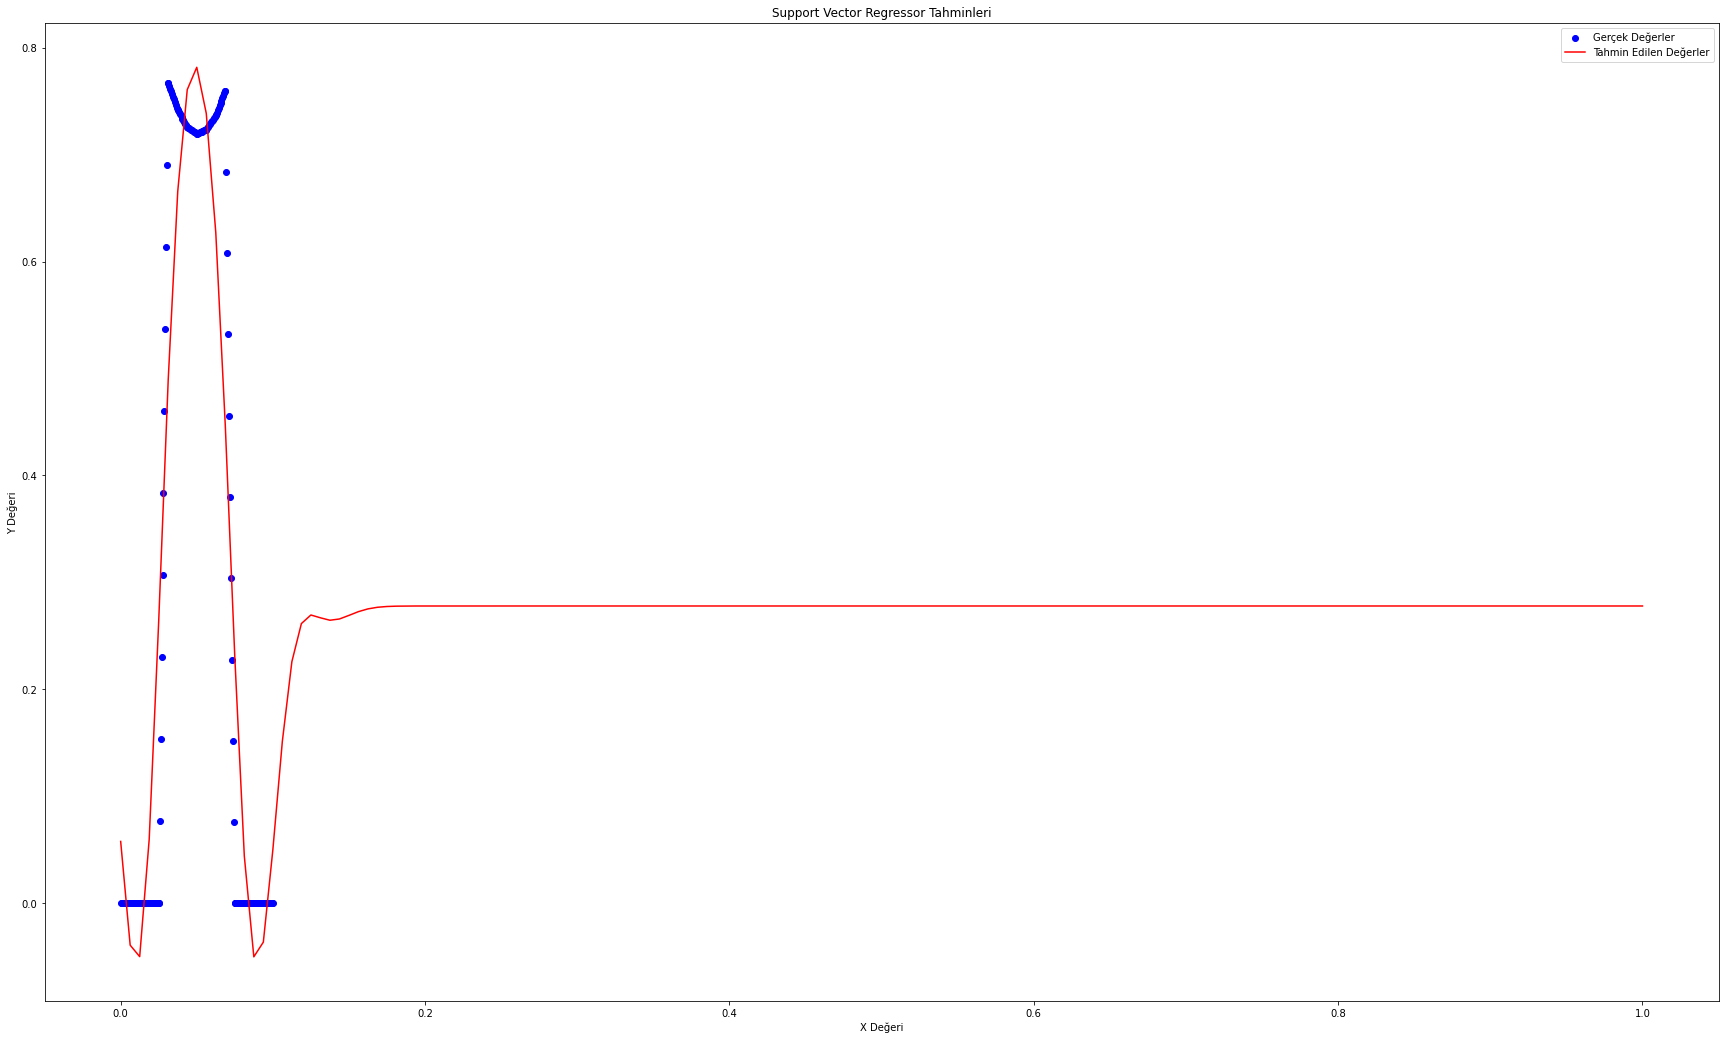

[0.28]


In [15]:
svr_reg = SVR(kernel = 'rbf', degree= 24, epsilon = 0.05)


svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))


# Use test and show results of test set
y_hat = svr_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", svr_reg.score(X,y))



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Suppoort Vector Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()



train_sizes, train_scores, test_scores = learning_curve(estimator=svr_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Support Vector Regressor Learning Curve')
plt.grid()
plt.show()

#SVM RBF kernelli modelin predict sonuçları:
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.00625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = svr_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = svr_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Support Vector Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(svr_reg.predict([[0.72500]])) #0.72500 == 3.038857e-01 gerçek değerde

### PolynomialRegressor ile deneyelim

R2 Score (Polynomial Regression):  0.8796874568707107
MAE (Polynomial Regression):  0.09866806167964205
RMSE (Polynomial Regression):  0.12489110508755646
MAPE (Polynomial Regression):  inf


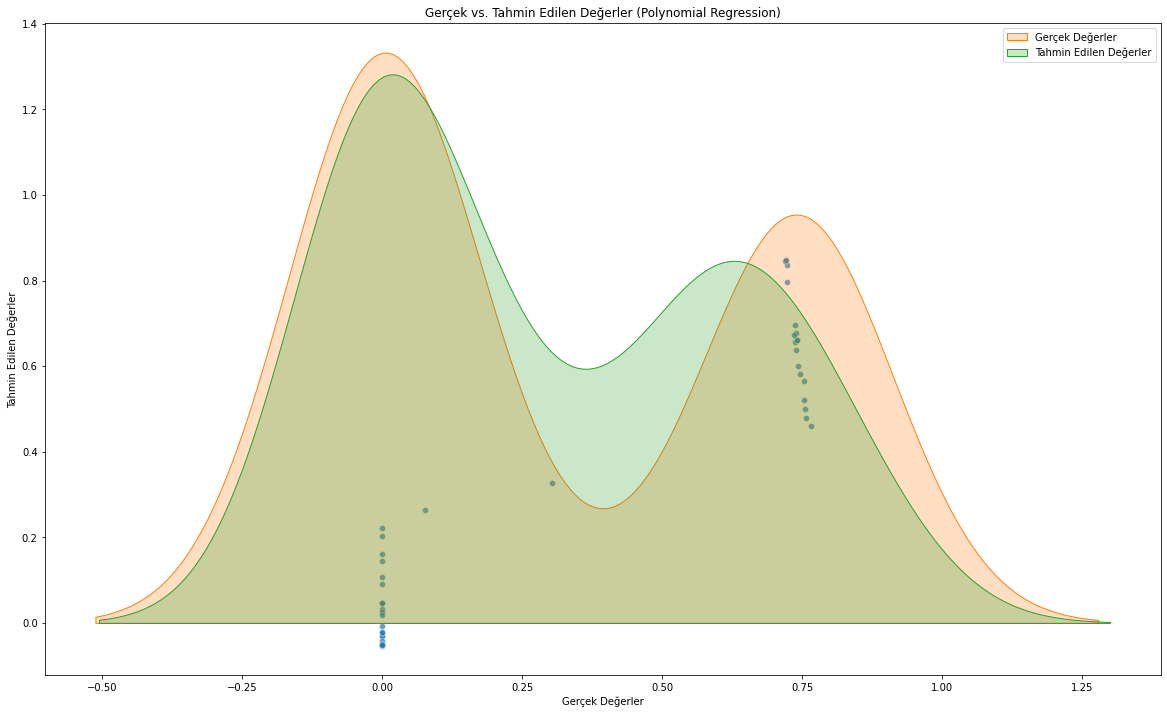

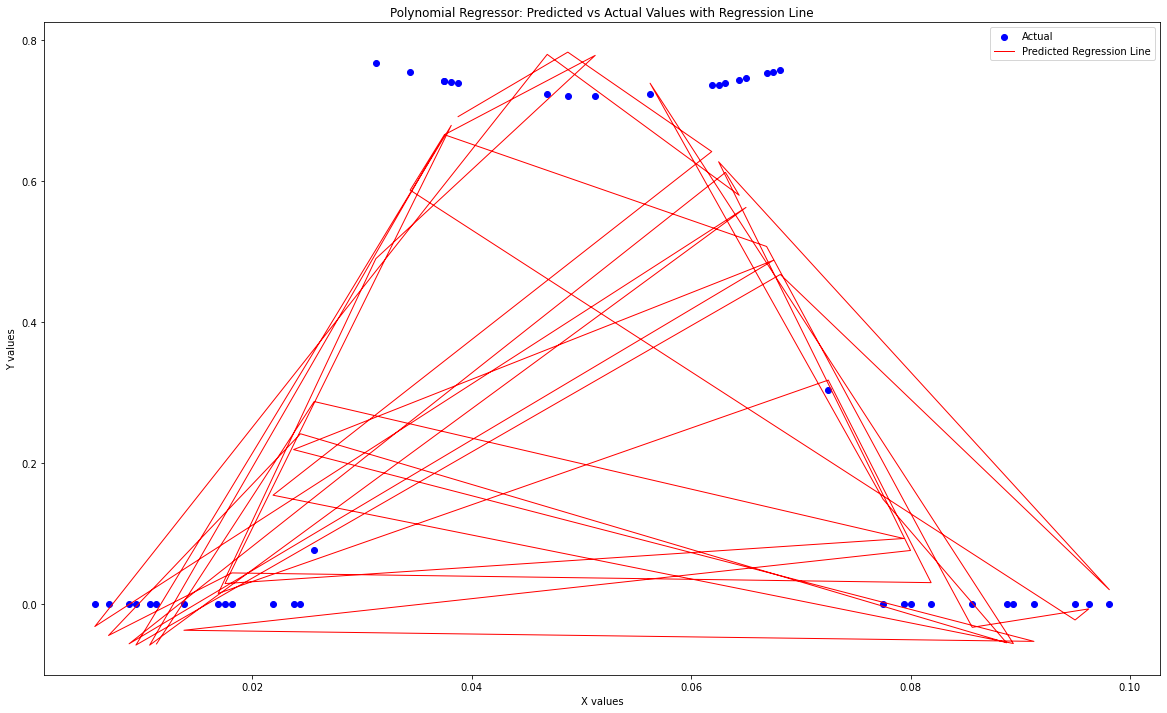

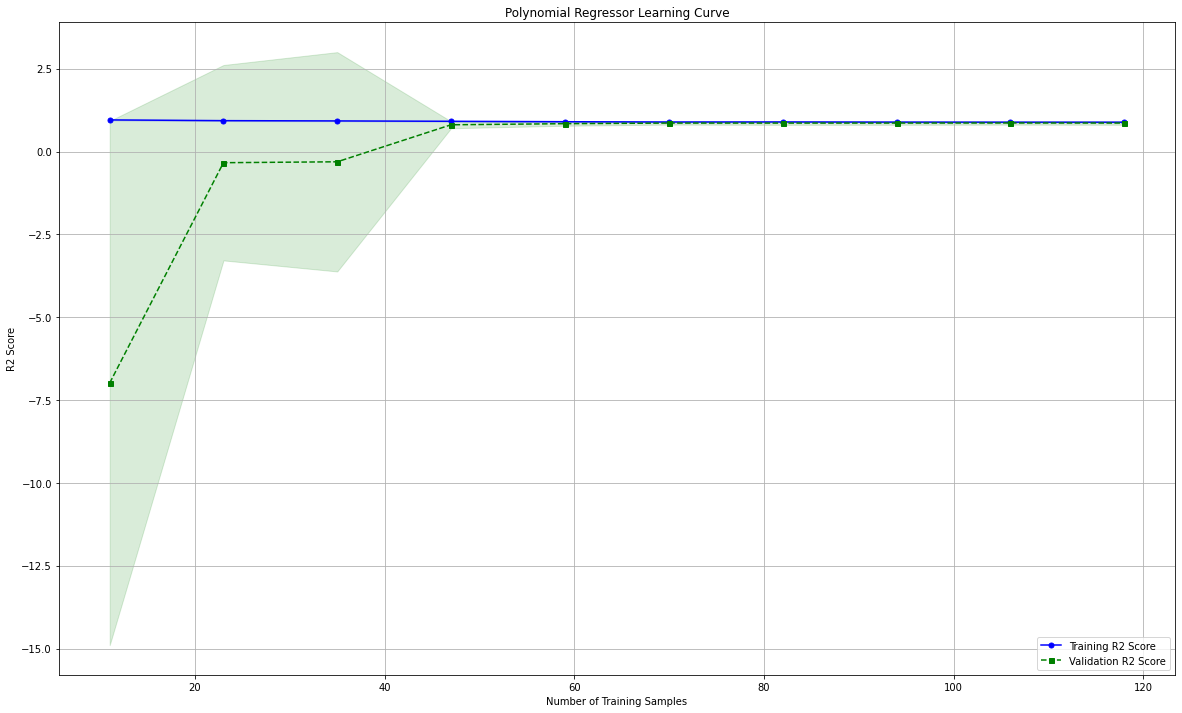

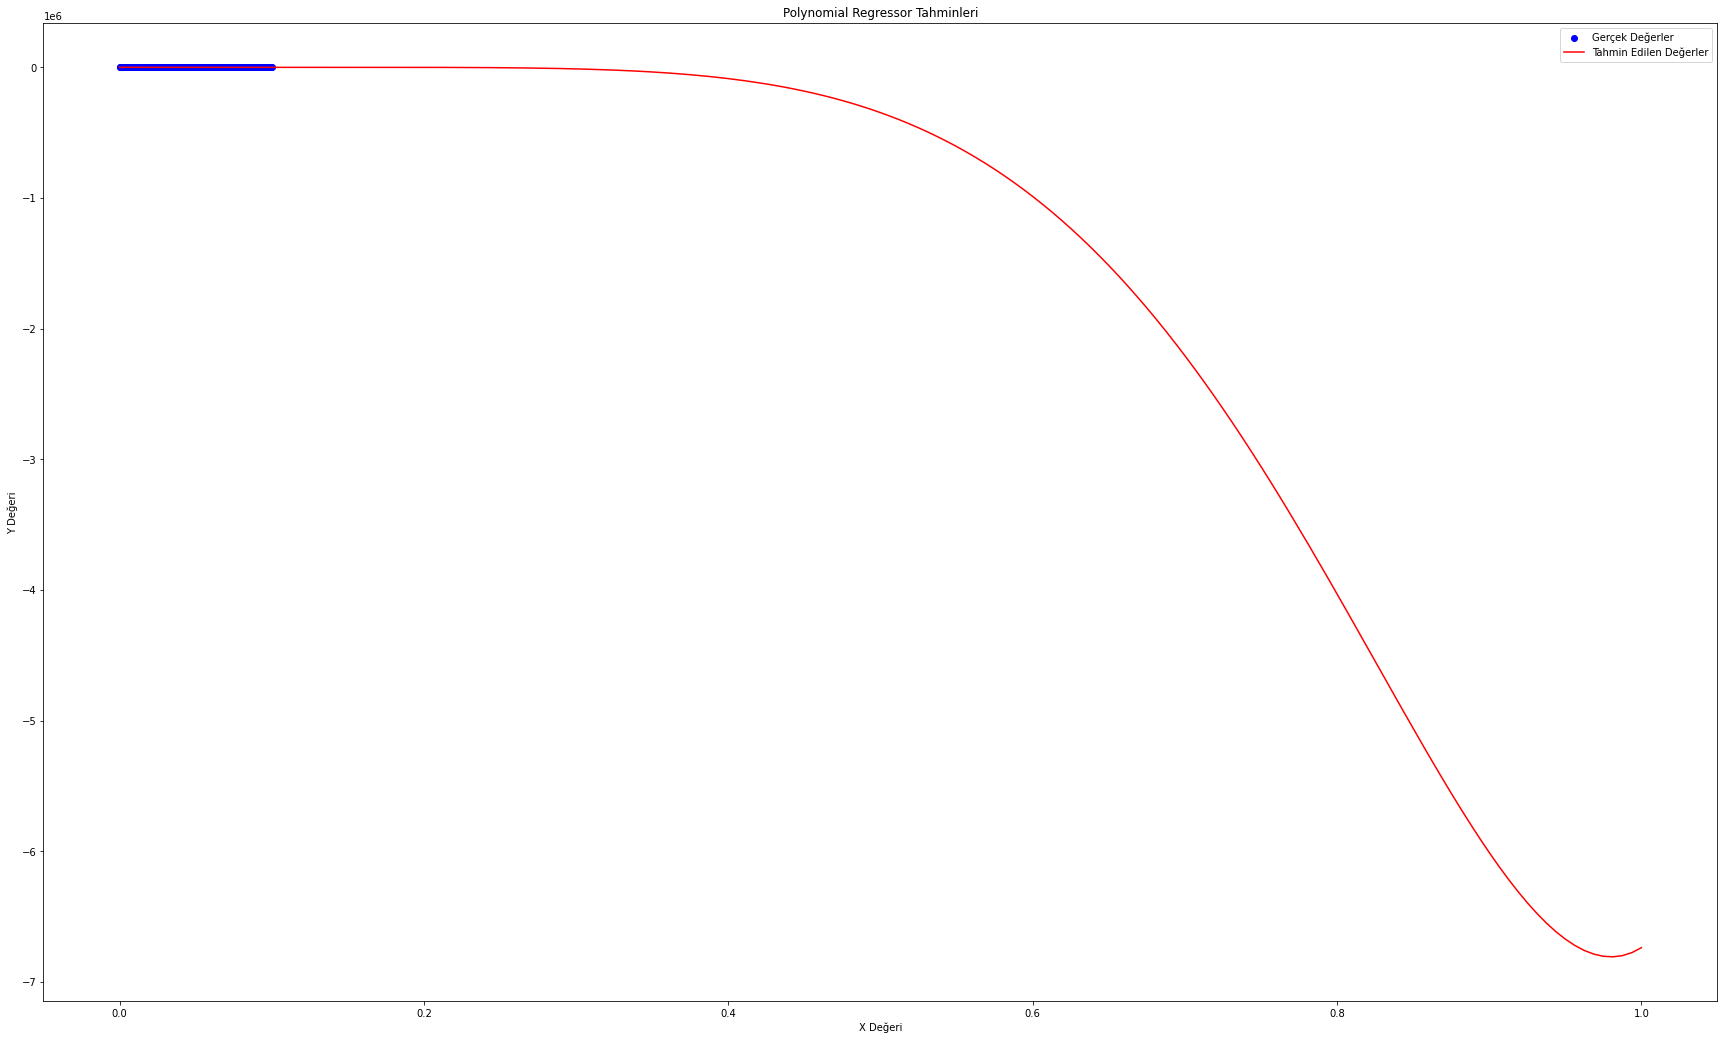

[-2611591.6]


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# PolynomialFeatures ile özellikleri genişletme
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

# Lineer Regresyon modeli oluşturma
poly_reg = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_reg.fit(X, y)

# Tahminler yapma
y_pred_poly = poly_reg.predict(X_test)

# Skorları ekrana yazdırma
print("R2 Score (Polynomial Regression): ", r2_score(y_test, y_pred_poly))
print("MAE (Polynomial Regression): ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("RMSE (Polynomial Regression): ", math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("MAPE (Polynomial Regression): ", np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100)

# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df_poly = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred_poly})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df_poly, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler (Polynomial Regression)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show()


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Polynomial Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=poly_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Polynomial Regressor Learning Curve')
plt.grid()
plt.show()


# Polynomial Regression Predict Sonuçları:
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.00625, 0.00625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = poly_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = poly_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Polynomial Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(poly_reg.predict([[0.72500]])) #0.72500 == 3.038857e-01 gerçek değerde

### Multi-Layer Perceptron

In [17]:
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=1, kernel_initializer='uniform', activation = 'linear'))

mlp.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )
mlp.fit(X_train, y_train,epochs=100, batch_size=32, validation_split=0.25)

y_pred = mlp.predict(X_test)




Epoch 1/100


4/4 [==============================] - 1s 54ms/step - loss: 0.2087 - mae: 0.3008 - val_loss: 0.2823 - val_mae: 0.4055
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2062 - mae: 0.3014 - val_loss: 0.2786 - val_mae: 0.4042
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2034 - mae: 0.3018 - val_loss: 0.2749 - val_mae: 0.4029
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2006 - mae: 0.3021 - val_loss: 0.2712 - val_mae: 0.4016
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1978 - mae: 0.3023 - val_loss: 0.2674 - val_mae: 0.4003
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1951 - mae: 0.3030 - val_loss: 0.2632 - val_mae: 0.3988
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1920 - mae: 0.3034 - val_loss: 0.2586 - val_mae: 0.3971
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1887 - mae: 0.3

4/4 [==============================] - 0s 8ms/step - loss: 0.1192 - mae: 0.3314 - val_loss: 0.1345 - val_mae: 0.3493
Epoch 56/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1191 - mae: 0.3322 - val_loss: 0.1332 - val_mae: 0.3484
Epoch 57/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1192 - mae: 0.3336 - val_loss: 0.1314 - val_mae: 0.3472
Epoch 58/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1190 - mae: 0.3343 - val_loss: 0.1306 - val_mae: 0.3466
Epoch 59/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1190 - mae: 0.3350 - val_loss: 0.1295 - val_mae: 0.3460
Epoch 60/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1191 - mae: 0.3357 - val_loss: 0.1283 - val_mae: 0.3454
Epoch 61/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1196 - mae: 0.3373 - val_loss: 0.1273 - val_mae: 0.3449
Epoch 62/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1197 - mae: 0.3376 - val_l

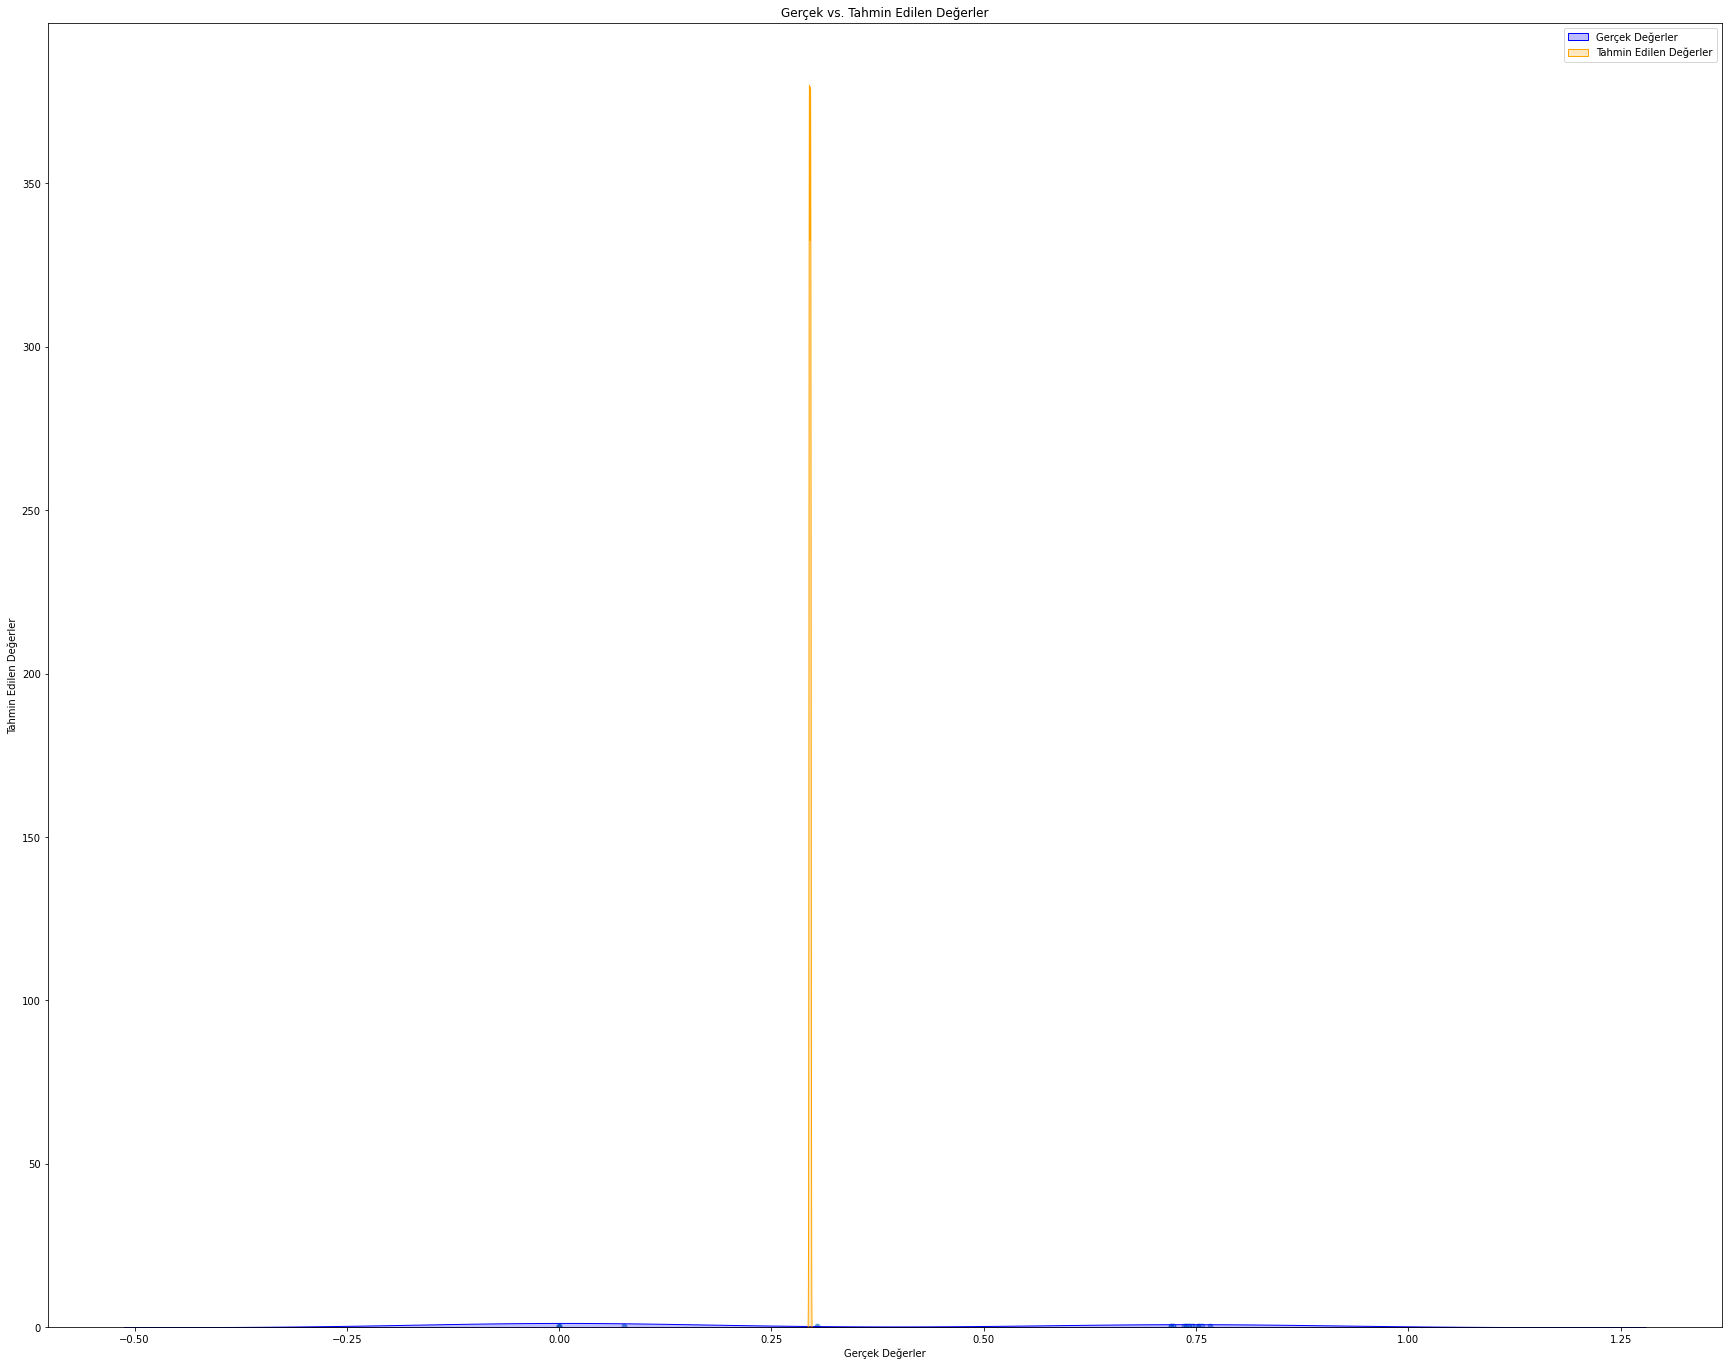

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df isminde bir DataFrame oluşturulduğunu varsayalım
result_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Scatter plot ve yoğunluk grafiği çizimi
plt.figure(figsize=(30, 24))

# Scatter plot
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='orange', shade=True)

plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()
plt.show()

Epoch 1/50
4/4 [==============================] - 0s 19ms/step - loss: 0.1177 - mae: 0.3299 - val_loss: 0.1584 - val_mae: 0.3936
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1181 - mae: 0.3315 - val_loss: 0.1552 - val_mae: 0.3905
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1179 - mae: 0.3321 - val_loss: 0.1537 - val_mae: 0.3890
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1179 - mae: 0.3323 - val_loss: 0.1536 - val_mae: 0.3888
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1180 - mae: 0.3324 - val_loss: 0.1544 - val_mae: 0.3896
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.1179 - mae: 0.3320 - val_loss: 0.1546 - val_mae: 0.3899
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1180 - mae: 0.3321 - val_loss: 0.1544 - val_mae: 0.3897
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1179 - mae: 0.3320 - val_loss

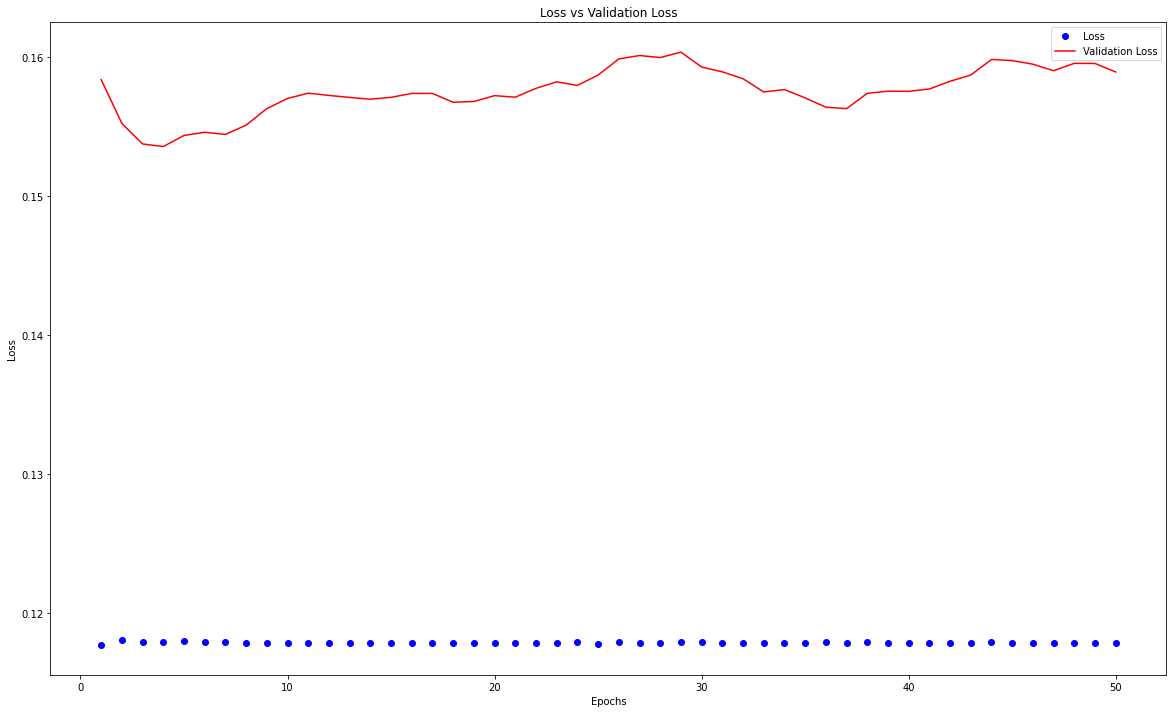

In [19]:
# Modelin eğitim sırasında kayıp (loss) ve doğrulama kaybı (validation loss) değerleri
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Modelin eğitim sürecindeki kayıp (loss) değerleri
loss = history.history['loss']

# Modelin eğitim sürecindeki doğrulama kaybı (validation loss) değerleri
val_loss = history.history['val_loss']

# Eğitim ve doğrulama kaybı grafiği çizimi
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 12))

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tüm modellerin grafiklerinin karşılaştırılması

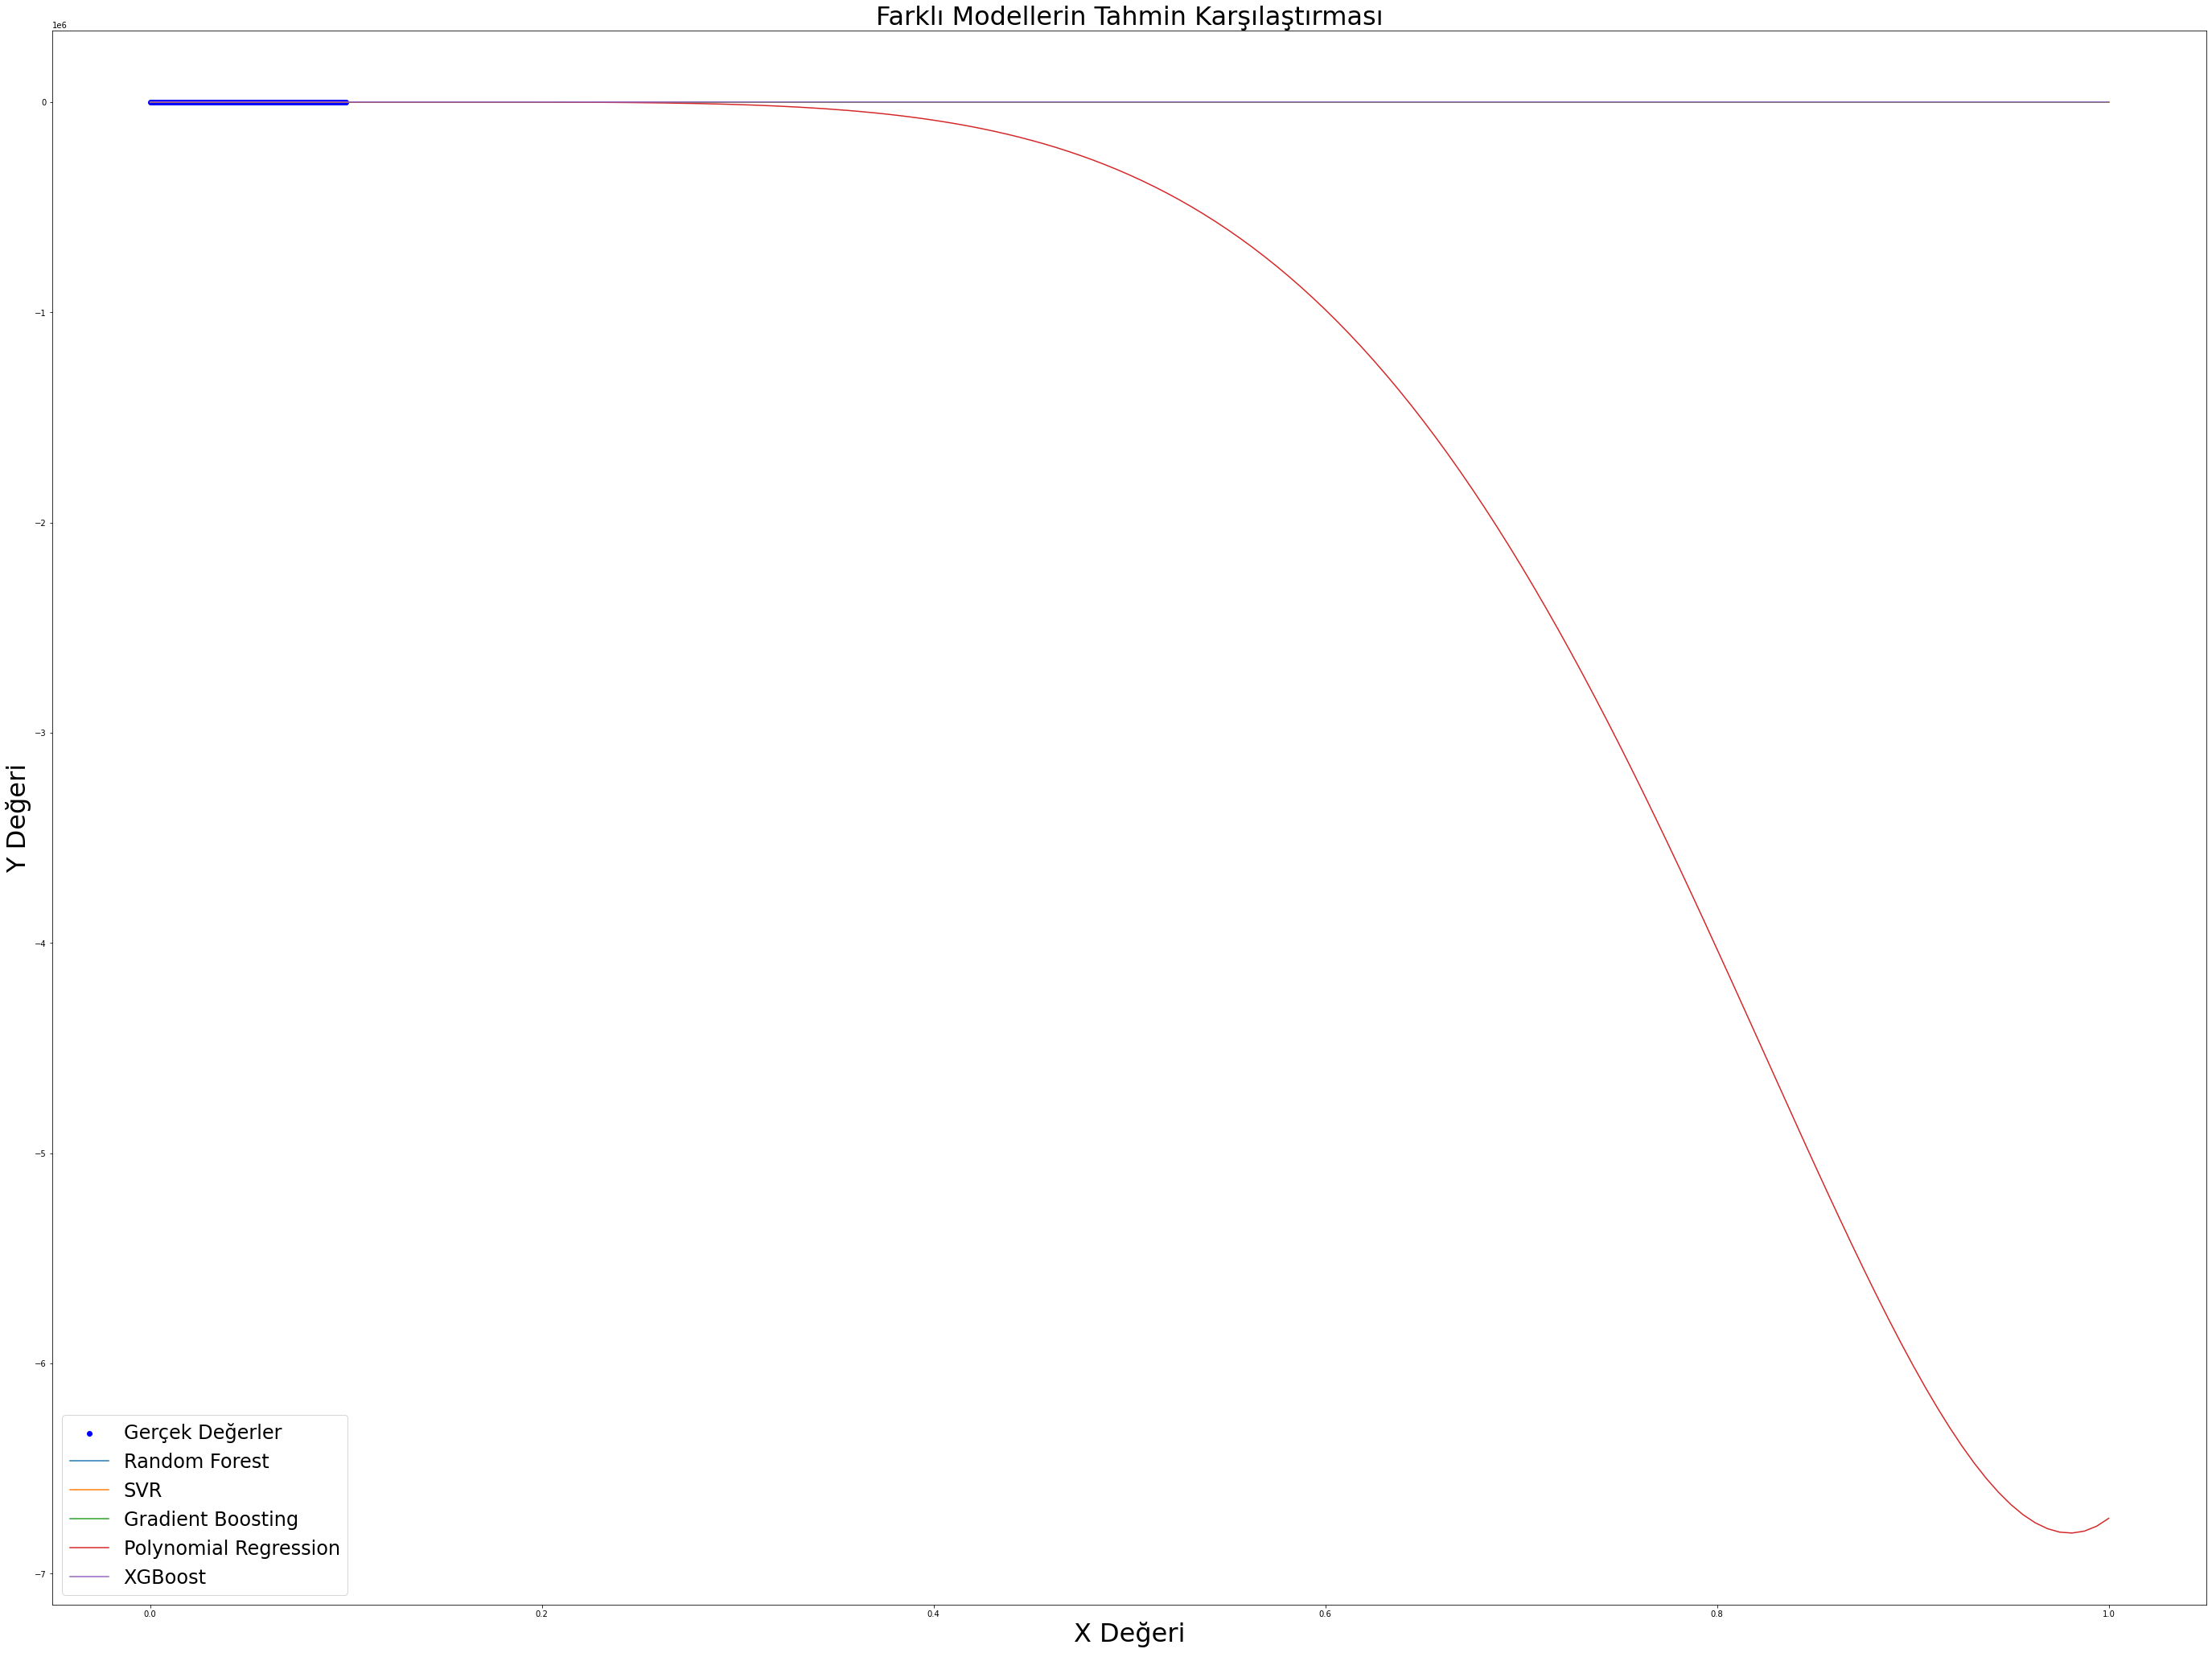

In [20]:
y_pred_rf = rf_reg.predict(X_values)
y_pred_svr = svr_reg.predict(X_values)  
y_pred_gb = gb_reg.predict(X_values)
y_pred_poly = poly_reg.predict(X_values)
y_pred_xgb = xgb.predict(X_values)

plt.figure(figsize=(48, 36))

# Gerçek değerler
plt.scatter(X, y, color='blue', label='Gerçek Değerler')

# Modellerin tahminleri
plt.plot(X_values, y_pred_rf, label='Random Forest')
plt.plot(X_values, y_pred_svr, label='SVR')
plt.plot(X_values, y_pred_gb, label='Gradient Boosting')
plt.plot(X_values, y_pred_poly, label='Polynomial Regression')
plt.plot(X_values, y_pred_xgb, label='XGBoost')

# Etiketler ve başlık
plt.xlabel('X Değeri',fontsize=32)
plt.ylabel('Y Değeri',fontsize=32)
plt.title('Farklı Modellerin Tahmin Karşılaştırması',fontsize=32)
plt.legend(fontsize=24)
plt.show()